In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ParameterGrid
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, log_loss, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import shap
from tqdm import tqdm

# Carregar dados

In [5]:
df = pd.read_csv("..//dados/NeoMort_MA.csv")
df.head().T

,0,1,2,3,4
Unnamed: 0,1.0,2.0,3.0,4.0,5.0
CODMUNNASC,210005.0,210005.0,210005.0,210005.0,210005.0
LOCNASC,1.0,1.0,1.0,1.0,1.0
IDADEMAE,19.0,25.0,18.0,23.0,24.0
ESTCIVMAE,2.0,2.0,1.0,2.0,1.0
ESCMAE,4.0,4.0,4.0,4.0,4.0
QTDFILVIVO,0.0,0.0,0.0,1.0,1.0
QTDFILMORT,0.0,0.0,0.0,0.0,0.0
GESTACAO,5.0,5.0,5.0,5.0,5.0
GRAVIDEZ,1.0,1.0,1.0,1.0,1.0


In [7]:
df_ns = pd.read_csv("..//dados/NeoMort_MA_nSMOTE.csv")
df_ns.head().T

,0,1,2,3,4
Unnamed: 0,1100.0,1147.0,1231.0,1305.0,1561.0
CODMUNNASC,210043.0,210043.0,210043.0,210043.0,210043.0
LOCNASC,1.0,1.0,1.0,1.0,1.0
IDADEMAE,18.0,14.0,27.0,37.0,18.0
ESTCIVMAE,5.0,9.0,1.0,5.0,1.0
ESCMAE,3.0,3.0,4.0,4.0,3.0
QTDFILVIVO,0.0,0.0,4.0,4.0,0.0
QTDFILMORT,0.0,0.0,0.0,2.0,0.0
GESTACAO,4.0,4.0,5.0,5.0,2.0
GRAVIDEZ,1.0,1.0,1.0,1.0,1.0


In [9]:
df_s = pd.read_csv("..//dados/NeoMort_MA_SMOTE.csv")
df_s.head().T

,0,1,2,3,4
Unnamed: 0,1100,1147,1231,1305,1561
CODMUNNASC,210043,210043,210043,210043,210043
LOCNASC,1,1,1,1,1
IDADEMAE,18,14,27,37,18
ESTCIVMAE,5,9,1,5,1
ESCMAE,3,3,4,4,3
QTDFILVIVO,0,0,4,4,0
QTDFILMORT,0,0,0,2,0
GESTACAO,4,4,5,5,2
GRAVIDEZ,1,1,1,1,1


# Random Forest

## DataFrame Desbalanceado

AUC: 0.789454790046353


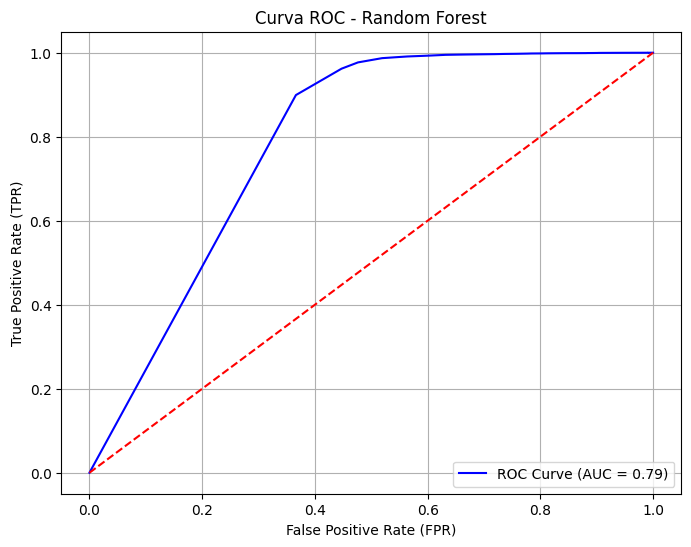

       Feature  Importancia
17        PESO     0.139553
12      DTNASC     0.121892
1   CODMUNNASC     0.084182
3     IDADEMAE     0.078389
15      APGAR5     0.061640
14      APGAR1     0.049398
24  KOTELCHUCK     0.031041
23    TPROBSON     0.028733
8     GESTACAO     0.027320
20  QTDGESTANT     0.025854
11   CONSULTAS     0.025217
6   QTDFILVIVO     0.023249
4    ESTCIVMAE     0.023067
5       ESCMAE     0.022595
21  QTDPARTNOR     0.021737
13        SEXO     0.017678
10       PARTO     0.016227
7   QTDFILMORT     0.016094
22  QTDPARTCES     0.012904
18    IDANOMAL     0.009759
19  RACACORMAE     0.007101
16     RACACOR     0.007024
9     GRAVIDEZ     0.002804
2      LOCNASC     0.002731


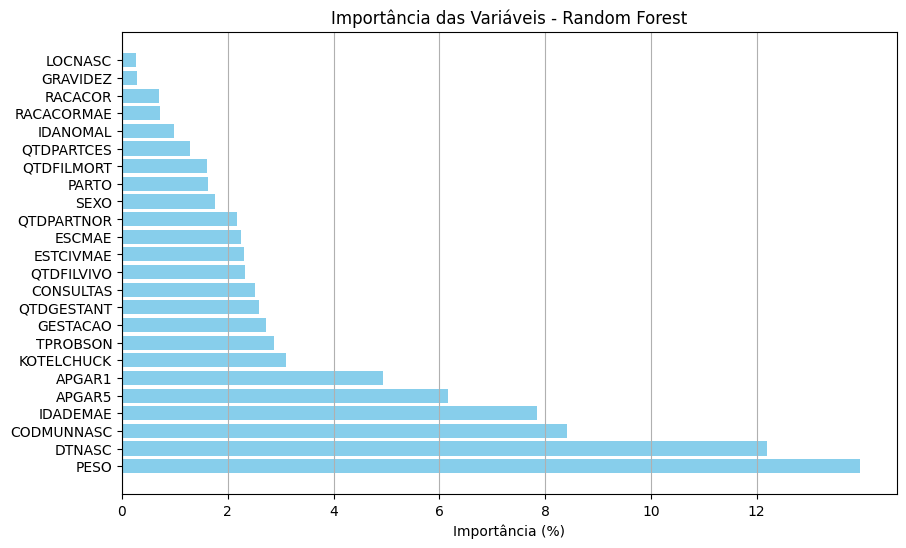

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       445
           1       1.00      1.00      1.00    148654

    accuracy                           1.00    149099
   macro avg       1.00      0.50      0.50    149099
weighted avg       1.00      1.00      1.00    149099



In [37]:
# Separando os dados (X são as variáveis independentes, y é a variável alvo)
X = df.drop('VIVO', axis=1)  # Substitua pela variável alvo correta
y = df['VIVO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo Random Forest
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Previsão das probabilidades para a classe positiva (morte neonatal)
y_probs = modelo.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando o valor da AUC
auc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_value}')

# Gerando o gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Importância das variáveis
importancias = modelo.feature_importances_

# Criando um DataFrame para visualização
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': importancias
})

# Removendo a linha onde a coluna é "Unnamed: 0" (se existir)
importancia_df = importancia_df[importancia_df['Feature'] != 'Unnamed: 0']

# Ordenando o DataFrame pela importância
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Exibindo a importância das variáveis
print(importancia_df)

# Gerando gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'] * 100, color='skyblue')  # Multiplica por 100
plt.xlabel('Importância (%)')  # Atualiza o rótulo do eixo x
plt.title('Importância das Variáveis - Random Forest')
plt.grid(axis='x')

# Atualiza os ticks do eixo x para mostrar inteiros
plt.xticks(range(0, int(importancia_df['Importancia'].max()*100), 2))  # Ticks de 0 a 100 com passo de 5
plt.show()

# Previsão das classes
y_pred = modelo.predict(X_test)

# Avaliando o modelo com precisão, recall e F1-score
report = classification_report(y_test, y_pred)
print(report)

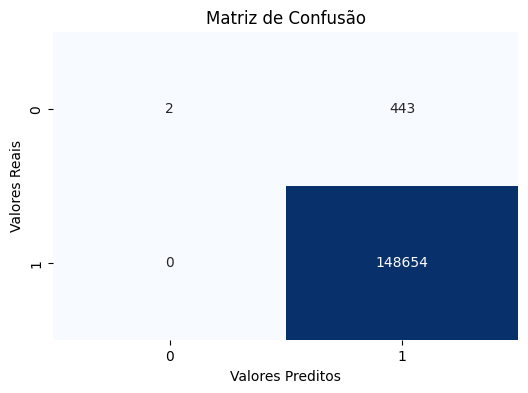

NameError: name 'precision_recall_curve' is not defined

In [39]:
# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusão')
plt.ylabel('Valores Reais')
plt.xlabel('Valores Preditos')
plt.show()

# Calculando a curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Gerando o gráfico Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Random Forest')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# Calculando o Log-Loss
log_loss_value = log_loss(y_test, y_probs)
print(f'Log-Loss: {log_loss_value}')

Treinando o modelo com Grid Search: 100%|█████████████████████████████████████████| 108/108 [3:44:29<00:00, 124.71s/it]


Melhor AUC: 0.8728224536548923
Melhor modelo: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
AUC: 0.822065635259194


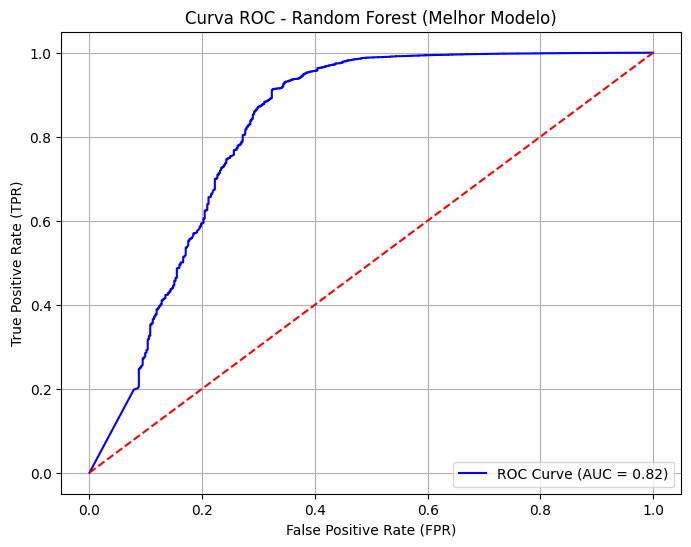

       Feature  Importancia
17        PESO     0.160310
0   Unnamed: 0     0.123999
12      DTNASC     0.107026
15      APGAR5     0.097434
1   CODMUNNASC     0.090678
3     IDADEMAE     0.070315
14      APGAR1     0.067598
8     GESTACAO     0.036270
23    TPROBSON     0.026941
24  KOTELCHUCK     0.026364
11   CONSULTAS     0.021161
20  QTDGESTANT     0.021103
4    ESTCIVMAE     0.019303
21  QTDPARTNOR     0.018794
6   QTDFILVIVO     0.018101
5       ESCMAE     0.016774
18    IDANOMAL     0.015336
13        SEXO     0.014655
10       PARTO     0.013056
7   QTDFILMORT     0.011775
22  QTDPARTCES     0.008675
19  RACACORMAE     0.005800
16     RACACOR     0.005455
9     GRAVIDEZ     0.001828
2      LOCNASC     0.001249


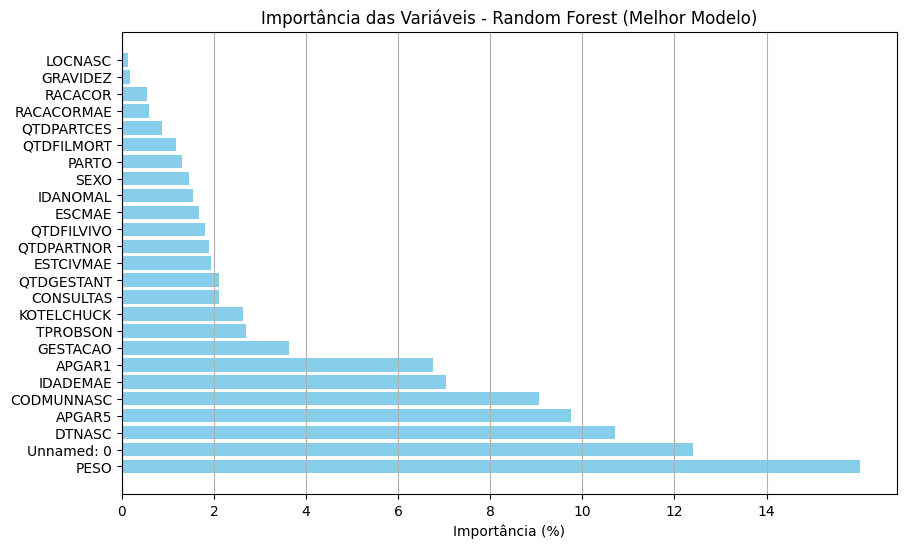

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       445
           1       1.00      1.00      1.00    148654

    accuracy                           1.00    149099
   macro avg       0.50      0.50      0.50    149099
weighted avg       0.99      1.00      1.00    149099



C:\Users\gabie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gabie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gabie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# Separando os dados (X são as variáveis independentes, y é a variável alvo)
X = df.drop('VIVO', axis=1)  # Substitua pela variável alvo correta
y = df['VIVO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo os parâmetros que serão ajustados manualmente com Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # número de árvores
    'max_depth': [None, 10, 20, 30],  # profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],  # número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]     # número mínimo de amostras em uma folha
}

# Convertendo a grade de parâmetros para uma lista de combinações
param_combinations = list(ParameterGrid(param_grid))
n_combinations = len(param_combinations)

# Instanciando o modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42)

melhor_auc = -np.inf
melhor_modelo = None

# Aplicando manualmente o Grid Search com barra de progresso
with tqdm(total=n_combinations, desc="Treinando o modelo com Grid Search") as pbar:
    for params in param_combinations:
        modelo_rf.set_params(**params)
        auc_scores = cross_val_score(modelo_rf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
        media_auc = np.mean(auc_scores)
        
        if media_auc > melhor_auc:
            melhor_auc = media_auc
            melhor_modelo = modelo_rf
        
        # Atualizando a barra de progresso
        pbar.update(1)

# Exibindo os melhores parâmetros encontrados
print(f'Melhor AUC: {melhor_auc}')
print(f'Melhor modelo: {melhor_modelo.get_params()}')

# Treinando o modelo com os melhores parâmetros
melhor_modelo.fit(X_train, y_train)

# Previsão das probabilidades para a classe positiva (morte neonatal)
y_probs = melhor_modelo.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando o valor da AUC
auc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_value}')

# Gerando o gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Random Forest (Melhor Modelo)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Importância das variáveis do melhor modelo
importancias = melhor_modelo.feature_importances_

# Criando um DataFrame para visualização
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': importancias
})

# Ordenando o DataFrame pela importância
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Exibindo a importância das variáveis
print(importancia_df)

# Gerando gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'] * 100, color='skyblue')  # Multiplica por 100
plt.xlabel('Importância (%)')  # Atualiza o rótulo do eixo x
plt.title('Importância das Variáveis - Random Forest (Melhor Modelo)')
plt.grid(axis='x')

# Atualiza os ticks do eixo x para mostrar inteiros
plt.xticks(range(0, int(importancia_df['Importancia'].max()*100), 2))  # Ticks de 0 a 100 com passo de 2
plt.show()

In [33]:
# Previsão das classes
y_pred = melhor_modelo.predict(X_test)

# Avaliando o modelo com precisão, recall e F1-score, adicionando zero_division=1
report = classification_report(y_test, y_pred, zero_division=1)  # Ajusta zero_division para evitar o aviso
print(report)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       445
           1       1.00      1.00      1.00    148654

    accuracy                           1.00    149099
   macro avg       1.00      0.50      0.50    149099
weighted avg       1.00      1.00      1.00    149099



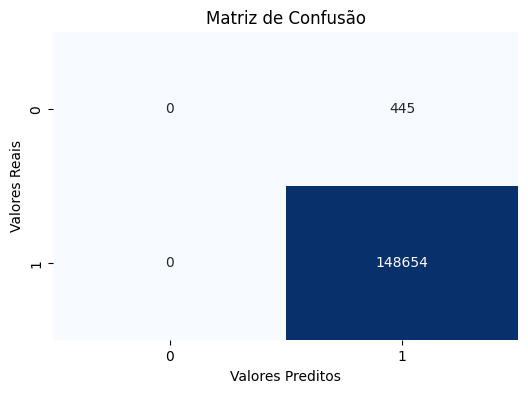

NameError: name 'precision_recall_curve' is not defined

In [35]:
# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusão')
plt.ylabel('Valores Reais')
plt.xlabel('Valores Preditos')
plt.show()

# Calculando a curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Gerando o gráfico Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Random Forest')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# Calculando o Log-Loss
log_loss_value = log_loss(y_test, y_probs)
print(f'Log-Loss: {log_loss_value}')

## DataFrame balanceado sem SMOTE

AUC: 0.8666995994500621


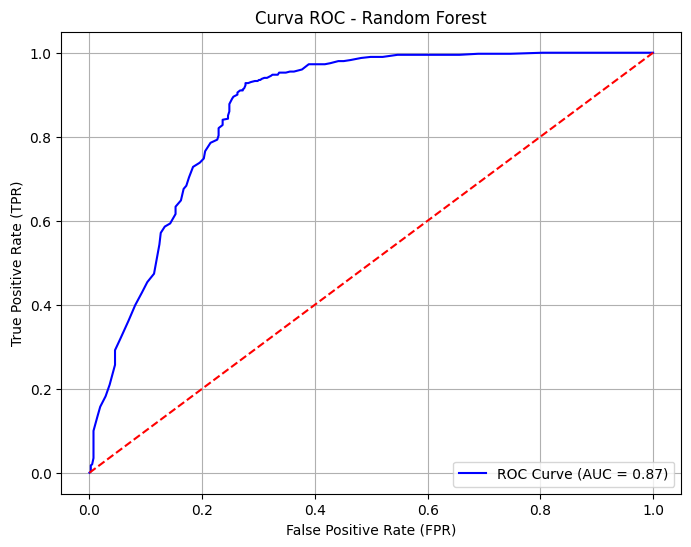

       Feature  Importancia
15      APGAR5     0.171158
17        PESO     0.150399
14      APGAR1     0.136134
12      DTNASC     0.066164
23    TPROBSON     0.061586
3     IDADEMAE     0.049126
8     GESTACAO     0.048253
1   CODMUNNASC     0.045501
24  KOTELCHUCK     0.022005
20  QTDGESTANT     0.019741
11   CONSULTAS     0.019359
18    IDANOMAL     0.017187
4    ESTCIVMAE     0.016436
6   QTDFILVIVO     0.015969
21  QTDPARTNOR     0.015327
5       ESCMAE     0.013870
13        SEXO     0.012898
10       PARTO     0.011172
22  QTDPARTCES     0.010492
16     RACACOR     0.009602
19  RACACORMAE     0.009159
7   QTDFILMORT     0.008595
2      LOCNASC     0.001414
9     GRAVIDEZ     0.000777


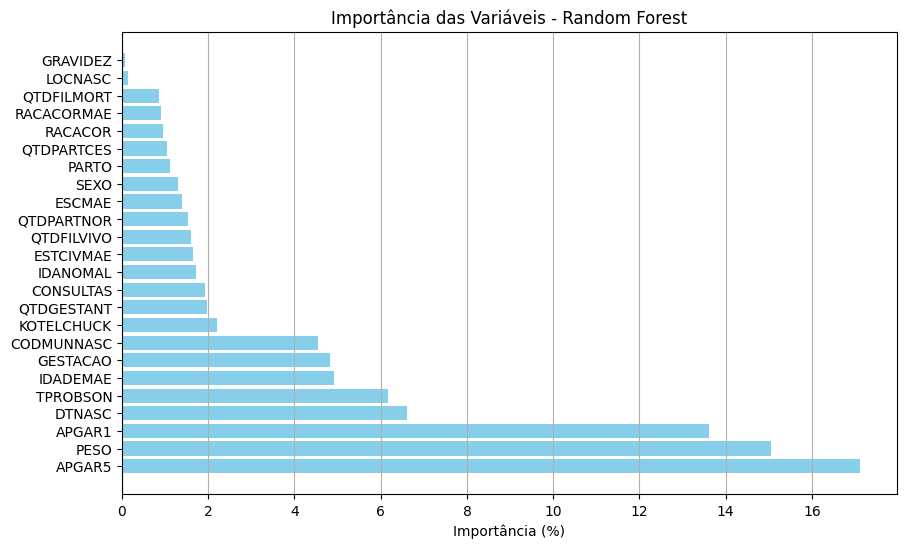

In [58]:
# Separando os dados (X são as variáveis independentes, y é a variável alvo)
X = df_ns.drop('VIVO', axis=1)  # Substitua pela variável alvo correta
y = df_ns['VIVO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo Random Forest
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Previsão das probabilidades para a classe positiva (morte neonatal)
y_probs = modelo.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando o valor da AUC
auc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_value}')

# Gerando o gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Importância das variáveis
importancias = modelo.feature_importances_

# Criando um DataFrame para visualização
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': importancias
})

# Removendo a linha onde a coluna é "Unnamed: 0" (se existir)
importancia_df = importancia_df[importancia_df['Feature'] != 'Unnamed: 0']

# Ordenando o DataFrame pela importância
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Exibindo a importância das variáveis
print(importancia_df)

# Gerando gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'] * 100, color='skyblue')  # Multiplica por 100
plt.xlabel('Importância (%)')  # Atualiza o rótulo do eixo x
plt.title('Importância das Variáveis - Random Forest')
plt.grid(axis='x')

# Atualiza os ticks do eixo x para mostrar inteiros
plt.xticks(range(0, int(importancia_df['Importancia'].max()*100), 2))  # Ticks de 0 a 100 com passo de 5
plt.show()

In [62]:
# Previsão das classes
y_pred = modelo.predict(X_test)

# Avaliando o modelo com precisão, recall e F1-score
report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(report)

# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criando um DataFrame para uma visualização mais amigável
cm_df = pd.DataFrame(cm, index=['Real: Negativo', 'Real: Positivo'], 
                     columns=['Predito: Negativo', 'Predito: Positivo'])
print("\nMatriz de Confusão (com rótulos):")
print(cm_df)

print("\n")

# Calculando o Log-Loss
log_loss_value = log_loss(y_test, y_probs)
print(f'Log-Loss: {log_loss_value}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       419
           1       0.77      0.88      0.82       401

    accuracy                           0.81       820
   macro avg       0.82      0.81      0.81       820
weighted avg       0.82      0.81      0.81       820


Matriz de Confusão (com rótulos):
                Predito: Negativo  Predito: Positivo
Real: Negativo                315                104
Real: Positivo                 49                352


Log-Loss: 0.4258236241754759


Fitting 5 folds for each of 750 candidates, totalling 3750 fits
Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
AUC: 0.8735440634690124


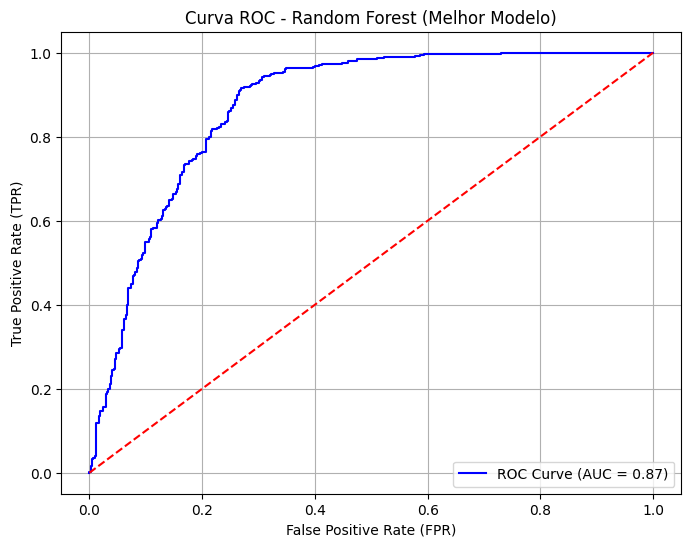

       Feature  Importancia
15      APGAR5     0.302061
14      APGAR1     0.190544
17        PESO     0.166628
23    TPROBSON     0.072982
8     GESTACAO     0.069880
0   Unnamed: 0     0.031567
12      DTNASC     0.028599
1   CODMUNNASC     0.020429
3     IDADEMAE     0.018753
18    IDANOMAL     0.018737
11   CONSULTAS     0.013108
24  KOTELCHUCK     0.009637
20  QTDGESTANT     0.007308
21  QTDPARTNOR     0.006633
6   QTDFILVIVO     0.006586
16     RACACOR     0.006395
13        SEXO     0.006318
4    ESTCIVMAE     0.005988
10       PARTO     0.004592
19  RACACORMAE     0.003913
5       ESCMAE     0.003518
22  QTDPARTCES     0.003255
7   QTDFILMORT     0.002115
2      LOCNASC     0.000384
9     GRAVIDEZ     0.000070


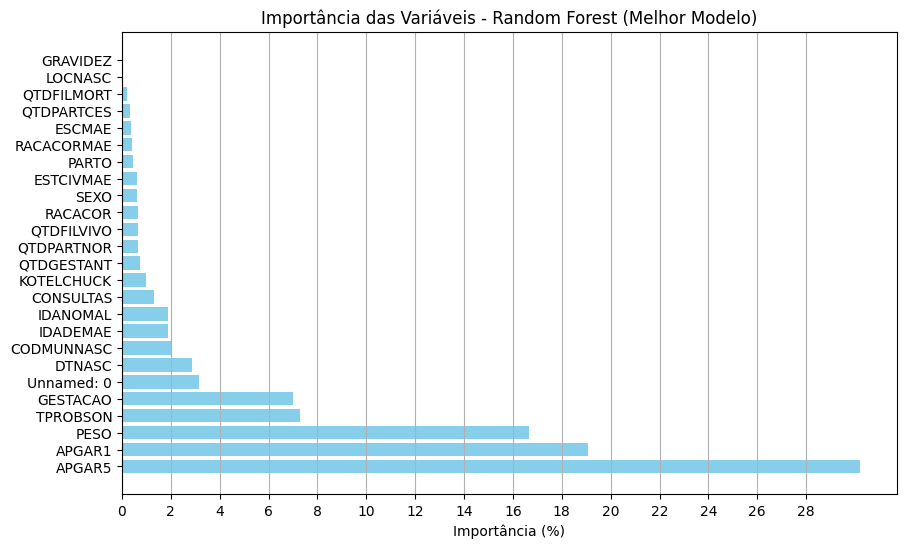

In [80]:
# Separando os dados (X são as variáveis independentes, y é a variável alvo)
X = df_ns.drop('VIVO', axis=1)  # Substitua pela variável alvo correta
y = df_ns['VIVO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo os parâmetros que serão ajustados com Grid Search
# param_grid = {
#     'n_estimators': [100, 200, 300],  # número de árvores
#     'max_depth': [None, 10, 20, 30],  # profundidade máxima das árvores
#     'min_samples_split': [2, 5, 10],  # número mínimo de amostras para dividir um nó
#     'min_samples_leaf': [1, 2, 4]     # número mínimo de amostras em uma folha
# }

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # número de árvores
    'max_depth': [None, 10, 20, 30, 40, 50],  # profundidade máxima das árvores
    'min_samples_split': [2, 5, 10, 15, 20],  # número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4, 5, 10]     # número mínimo de amostras em uma folha
}

# Instanciando o modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42)

# Aplicando GridSearchCV com Cross Validation (cv=5)
grid_search = GridSearchCV(estimator=modelo_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado pelo Grid Search
melhor_modelo = grid_search.best_estimator_
print(f'Melhores parâmetros: {grid_search.best_params_}')

# Previsão das probabilidades para a classe positiva (morte neonatal)
y_probs = melhor_modelo.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando o valor da AUC
auc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_value}')

# Gerando o gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Random Forest (Melhor Modelo)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Importância das variáveis do melhor modelo
importancias = melhor_modelo.feature_importances_

# Criando um DataFrame para visualização
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': importancias
})

# Ordenando o DataFrame pela importância
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Exibindo a importância das variáveis
print(importancia_df)

# Gerando gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'] * 100, color='skyblue')  # Multiplica por 100
plt.xlabel('Importância (%)')  # Atualiza o rótulo do eixo x
plt.title('Importância das Variáveis - Random Forest (Melhor Modelo)')
plt.grid(axis='x')

# Atualiza os ticks do eixo x para mostrar inteiros
plt.xticks(range(0, int(importancia_df['Importancia'].max()*100), 2))  # Ticks de 0 a 100 com passo de 2
plt.show()

In [86]:
# Previsão das classes
y_pred = modelo.predict(X_test)

# Avaliando o modelo com precisão, recall e F1-score
report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(report)

# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criando um DataFrame para uma visualização mais amigável
cm_df = pd.DataFrame(cm, index=['Real: Negativo', 'Real: Positivo'], 
                     columns=['Predito: Negativo', 'Predito: Positivo'])
print("\nMatriz de Confusão (com rótulos):")
print(cm_df)

print("\n")

# Calculando o Log-Loss
log_loss_value = log_loss(y_test, y_probs)
print(f'Log-Loss: {log_loss_value}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       419
           1       0.87      0.99      0.93       401

    accuracy                           0.92       820
   macro avg       0.93      0.92      0.92       820
weighted avg       0.93      0.92      0.92       820


Matriz de Confusão (com rótulos):
                Predito: Negativo  Predito: Positivo
Real: Negativo                359                 60
Real: Positivo                  3                398


Log-Loss: 0.42141186138552084


## DataFrame balanceado com SMOTE

AUC: 0.9962320844125945


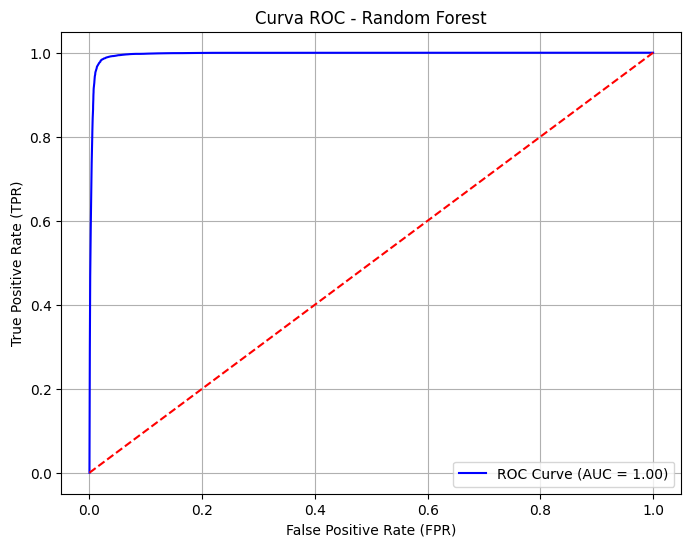

       Feature  Importancia
15      APGAR5     0.273464
14      APGAR1     0.153786
8     GESTACAO     0.117641
17        PESO     0.069694
23    TPROBSON     0.062653
1   CODMUNNASC     0.039167
11   CONSULTAS     0.033886
12      DTNASC     0.032393
4    ESTCIVMAE     0.027958
18    IDANOMAL     0.022406
13        SEXO     0.022232
24  KOTELCHUCK     0.021663
3     IDADEMAE     0.020442
10       PARTO     0.014516
5       ESCMAE     0.011025
6   QTDFILVIVO     0.008375
21  QTDPARTNOR     0.007932
20  QTDGESTANT     0.007925
22  QTDPARTCES     0.006505
7   QTDFILMORT     0.004231
9     GRAVIDEZ     0.003719
19  RACACORMAE     0.003438
16     RACACOR     0.003295
2      LOCNASC     0.000747


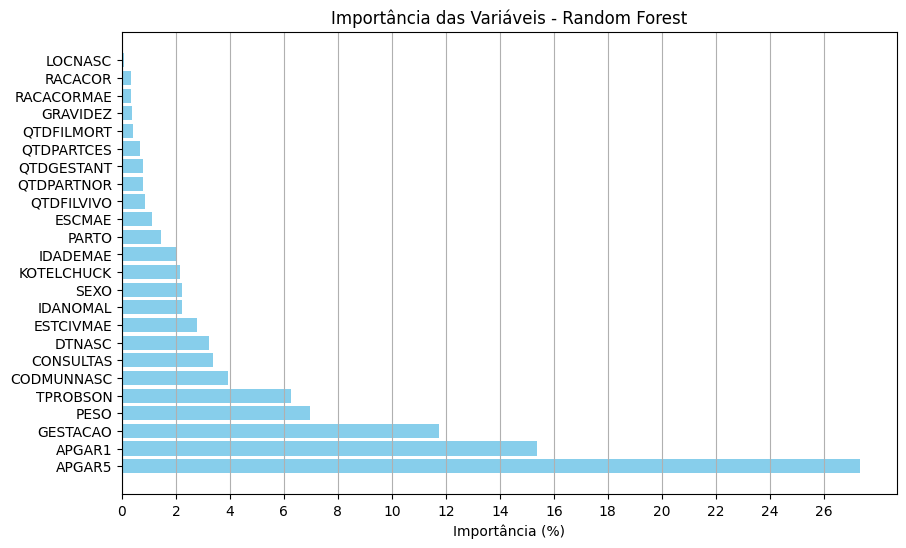

In [90]:
# Separando os dados (X são as variáveis independentes, y é a variável alvo)
X = df_s.drop('VIVO', axis=1)  # Substitua pela variável alvo correta
y = df_s['VIVO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo Random Forest
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Previsão das probabilidades para a classe positiva (morte neonatal)
y_probs = modelo.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando o valor da AUC
auc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_value}')

# Gerando o gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Importância das variáveis
importancias = modelo.feature_importances_

# Criando um DataFrame para visualização
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': importancias
})

# Removendo a linha onde a coluna é "Unnamed: 0" (se existir)
importancia_df = importancia_df[importancia_df['Feature'] != 'Unnamed: 0']

# Ordenando o DataFrame pela importância
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Exibindo a importância das variáveis
print(importancia_df)

# Gerando gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'] * 100, color='skyblue')  # Multiplica por 100
plt.xlabel('Importância (%)')  # Atualiza o rótulo do eixo x
plt.title('Importância das Variáveis - Random Forest')
plt.grid(axis='x')

# Atualiza os ticks do eixo x para mostrar inteiros
plt.xticks(range(0, int(importancia_df['Importancia'].max()*100), 2))  # Ticks de 0 a 100 com passo de 5
plt.show()

In [92]:
# Previsão das classes
y_pred = modelo.predict(X_test)

# Avaliando o modelo com precisão, recall e F1-score
report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(report)

# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criando um DataFrame para uma visualização mais amigável
cm_df = pd.DataFrame(cm, index=['Real: Negativo', 'Real: Positivo'], 
                     columns=['Predito: Negativo', 'Predito: Positivo'])
print("\nMatriz de Confusão (com rótulos):")
print(cm_df)

print("\n")

# Calculando o Log-Loss
log_loss_value = log_loss(y_test, y_probs)
print(f'Log-Loss: {log_loss_value}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14980
           1       0.98      0.98      0.98     15020

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000


Matriz de Confusão (com rótulos):
                Predito: Negativo  Predito: Positivo
Real: Negativo              14699                281
Real: Positivo                333              14687


Log-Loss: 0.08773747554033404


Treinando o modelo com Grid Search: 100%|██████████████████████████████████████████| 600/600 [4:06:46<00:00, 24.68s/it]


Melhor AUC: 0.9966302642058006
Melhor modelo: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
AUC: 0.9932584413483401


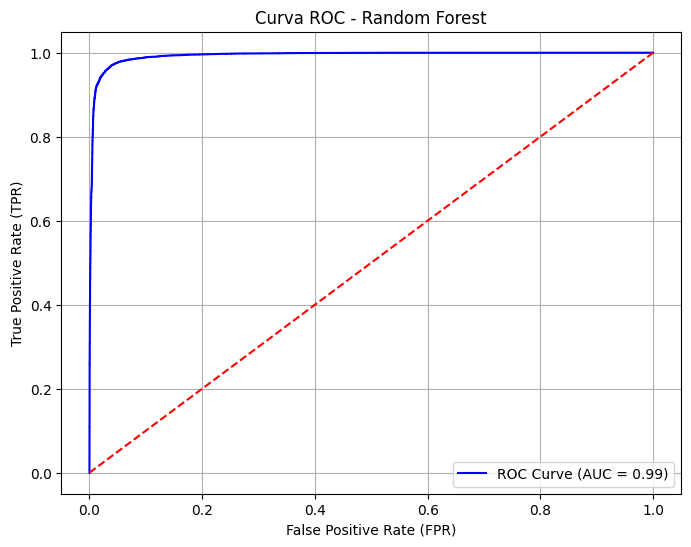

       Feature  Importancia
15      APGAR5     0.271502
14      APGAR1     0.205521
8     GESTACAO     0.133044
17        PESO     0.075792
23    TPROBSON     0.061540
11   CONSULTAS     0.035711
1   CODMUNNASC     0.032502
13        SEXO     0.024448
4    ESTCIVMAE     0.024375
18    IDANOMAL     0.020076
12      DTNASC     0.019647
0   Unnamed: 0     0.018783
24  KOTELCHUCK     0.017814
10       PARTO     0.011935
3     IDADEMAE     0.011005
5       ESCMAE     0.007197
22  QTDPARTCES     0.005590
6   QTDFILVIVO     0.005470
21  QTDPARTNOR     0.005018
20  QTDGESTANT     0.004746
9     GRAVIDEZ     0.002932
7   QTDFILMORT     0.002424
19  RACACORMAE     0.001435
16     RACACOR     0.001402
2      LOCNASC     0.000089


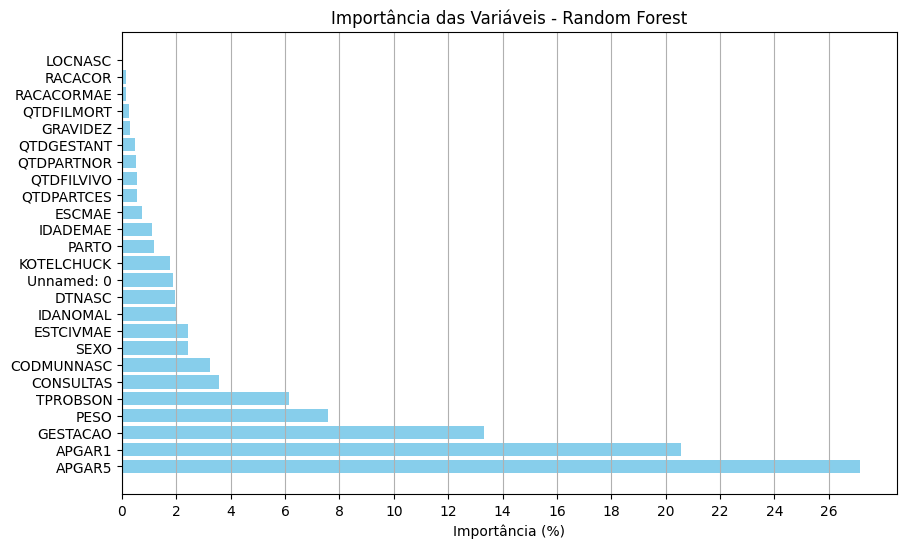

In [25]:
# Separando os dados (X são as variáveis independentes, y é a variável alvo)
X = df_s.drop('VIVO', axis=1)  # Substitua pela variável alvo correta
y = df_s['VIVO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo o modelo Random Forest
modelo = RandomForestClassifier(random_state=42)

# Definindo a grade de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # número de árvores
    'max_depth': [None, 10, 20, 30, 40, 50],  # profundidade máxima das árvores
    'min_samples_split': [2, 5, 10, 15],  # número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4, 6, 8],  # número mínimo de amostras em uma folha
}

# Configurando o GridSearchCV
param_combinations = list(ParameterGrid(param_grid))
n_combinations = len(param_combinations)

# Barra de progresso para acompanhar as iterações
with tqdm(total=n_combinations, desc="Treinando o modelo com Grid Search") as pbar:
    melhor_auc = -np.inf
    melhor_modelo = None
    for params in param_combinations:
        # Atualiza o modelo com os parâmetros atuais
        modelo.set_params(**params)
        
        # Treinando o modelo com validação cruzada
        auc_scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
        media_auc = np.mean(auc_scores)
        
        # Atualizando o melhor modelo se a AUC for a maior
        if media_auc > melhor_auc:
            melhor_auc = media_auc
            melhor_modelo = modelo
        
        # Atualizando a barra de progresso
        pbar.update(1)

# Exibindo os melhores parâmetros encontrados
print(f'Melhor AUC: {melhor_auc}')
print(f'Melhor modelo: {melhor_modelo.get_params()}')

# Previsão das probabilidades para a classe positiva (morte neonatal)
melhor_modelo.fit(X_train, y_train)
y_probs = melhor_modelo.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando o valor da AUC
auc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_value}')

# Gerando o gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Importância das variáveis
importancias = melhor_modelo.feature_importances_

# Criando um DataFrame para visualização
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': importancias
})

# Ordenando o DataFrame pela importância
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Exibindo a importância das variáveis
print(importancia_df)

# Gerando gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'] * 100, color='skyblue')  # Multiplica por 100
plt.xlabel('Importância (%)')  # Atualiza o rótulo do eixo x
plt.title('Importância das Variáveis - Random Forest')
plt.grid(axis='x')

# Atualiza os ticks do eixo x para mostrar inteiros
plt.xticks(range(0, int(importancia_df['Importancia'].max()*100), 2))  # Ticks de 0 a 100 com passo de 5
plt.show()

In [27]:
# Previsão das classes
y_pred = modelo.predict(X_test)

# Avaliando o modelo com precisão, recall e F1-score
report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(report)

# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criando um DataFrame para uma visualização mais amigável
cm_df = pd.DataFrame(cm, index=['Real: Negativo', 'Real: Positivo'], 
                     columns=['Predito: Negativo', 'Predito: Positivo'])
print("\nMatriz de Confusão (com rótulos):")
print(cm_df)

print("\n")

# Calculando o Log-Loss
log_loss_value = log_loss(y_test, y_probs)
print(f'Log-Loss: {log_loss_value}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     14980
           1       0.96      0.97      0.97     15020

    accuracy                           0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000


Matriz de Confusão (com rótulos):
                Predito: Negativo  Predito: Positivo
Real: Negativo              14426                554
Real: Positivo                494              14526


Log-Loss: 0.11835698320300783


# CatBoost

## DataFrame desbalanceado

AUC: 0.8561780368348005


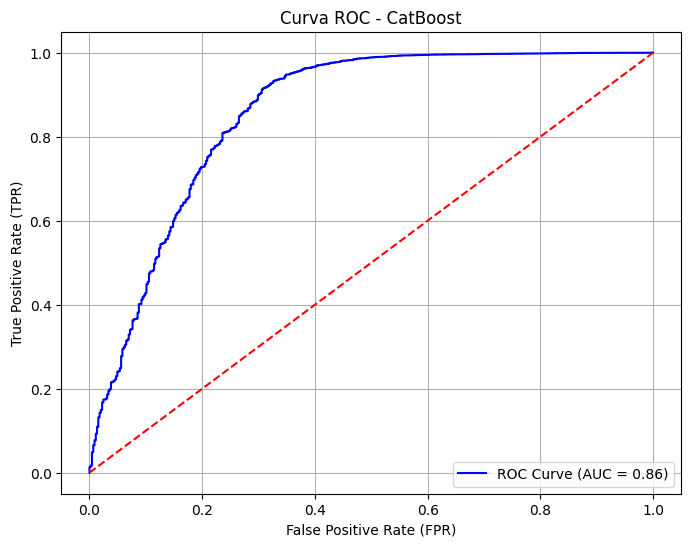

       Feature  Importancia
17        PESO    23.412121
14      APGAR1    17.607791
15      APGAR5    10.987816
1   CODMUNNASC     7.022616
8     GESTACAO     5.490872
16     RACACOR     5.210977
5       ESCMAE     3.768944
23    TPROBSON     3.520578
18    IDANOMAL     3.134017
3     IDADEMAE     2.811136
24  KOTELCHUCK     2.799246
10       PARTO     2.015858
12      DTNASC     1.968184
4    ESTCIVMAE     1.673464
19  RACACORMAE     1.360414
11   CONSULTAS     1.155005
9     GRAVIDEZ     0.934631
6   QTDFILVIVO     0.695057
13        SEXO     0.440020
21  QTDPARTNOR     0.199869
20  QTDGESTANT     0.147337
22  QTDPARTCES     0.137983
7   QTDFILMORT     0.109695
2      LOCNASC     0.070335


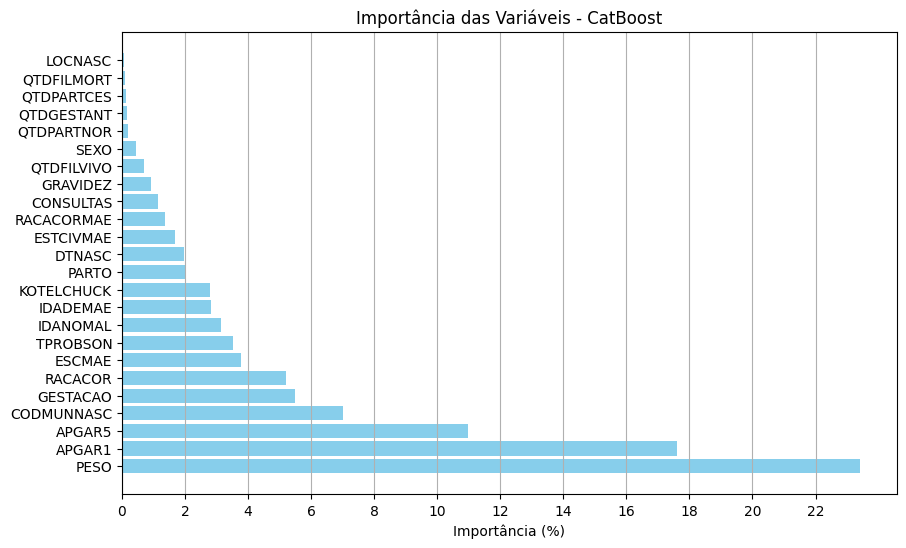

              precision    recall  f1-score   support

           0       0.20      0.00      0.00       445
           1       1.00      1.00      1.00    148654

    accuracy                           1.00    149099
   macro avg       0.60      0.50      0.50    149099
weighted avg       0.99      1.00      1.00    149099



In [265]:
# Separando os dados (X são as variáveis independentes, y é a variável alvo)
X = df.drop('VIVO', axis=1)  # Substitua pela variável alvo correta
y = df['VIVO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo CatBoost
modelo = CatBoostClassifier(random_state=42, verbose=0)  # verbose=0 para evitar mensagens durante o treino
modelo.fit(X_train, y_train)

# Previsão das probabilidades para a classe positiva (morte neonatal)
y_probs = modelo.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando o valor da AUC
auc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_value}')

# Gerando o gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - CatBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Importância das variáveis
importancias = modelo.get_feature_importance()

# Criando um DataFrame para visualização
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': importancias
})

# Removendo a linha onde a coluna é "Unnamed: 0" (se existir)
importancia_df = importancia_df[importancia_df['Feature'] != 'Unnamed: 0']

# Ordenando o DataFrame pela importância
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Exibindo a importância das variáveis
print(importancia_df)

# Gerando gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'], color='skyblue')  # Multiplica por 100
plt.xlabel('Importância (%)')  # Atualiza o rótulo do eixo x
plt.title('Importância das Variáveis - CatBoost')
plt.grid(axis='x')

# Atualiza os ticks do eixo x para mostrar inteiros
plt.xticks(range(0, int(importancia_df['Importancia'].max()), 2))  # Ticks de 0 a 100 com passo de 5
plt.show()

# Previsão das classes
y_pred = modelo.predict(X_test)

# Avaliando o modelo com precisão, recall e F1-score
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusão')
plt.ylabel('Valores Reais')
plt.xlabel('Valores Preditos')
plt.show()

# Calculando a curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Gerando o gráfico Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Random Forest')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# Calculando o Log-Loss
log_loss_value = log_loss(y_test, y_probs)
print(f'Log-Loss: {log_loss_value}')

AUC: 0.8763592212785459


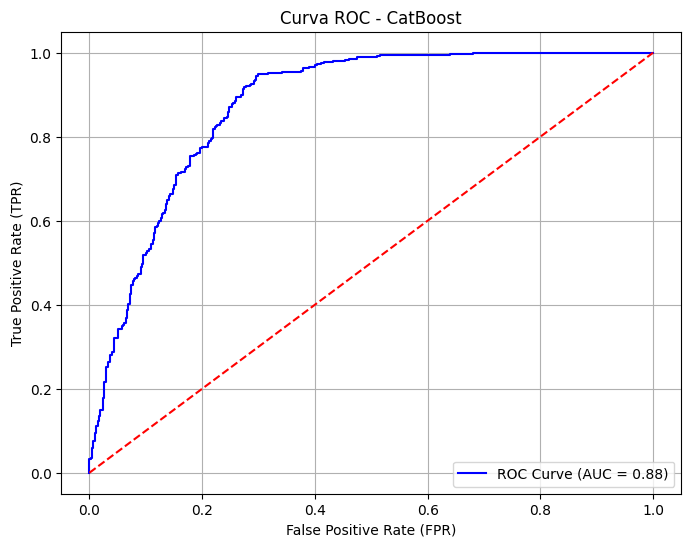

       Feature  Importancia
17        PESO    15.445887
15      APGAR5    14.821653
12      DTNASC     8.002733
14      APGAR1     7.449982
1   CODMUNNASC     5.909782
23    TPROBSON     5.283193
3     IDADEMAE     4.462220
8     GESTACAO     3.879546
13        SEXO     3.051985
10       PARTO     2.696332
24  KOTELCHUCK     2.663137
4    ESTCIVMAE     2.605590
11   CONSULTAS     2.501654
18    IDANOMAL     2.465941
21  QTDPARTNOR     1.882938
5       ESCMAE     1.598022
19  RACACORMAE     1.530832
20  QTDGESTANT     1.515089
22  QTDPARTCES     1.471914
16     RACACOR     1.328870
6   QTDFILVIVO     1.040360
7   QTDFILMORT     0.506877
9     GRAVIDEZ     0.286971
2      LOCNASC     0.237729


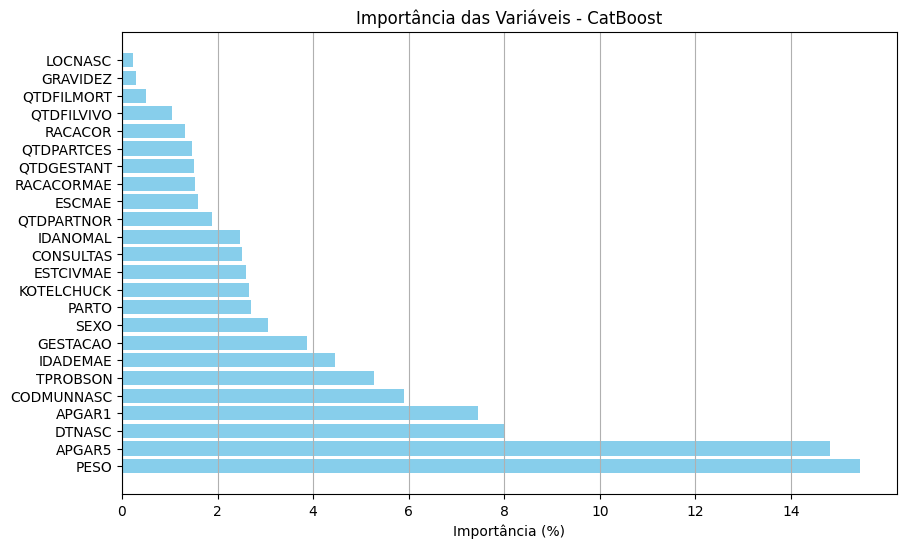

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       419
           1       0.77      0.88      0.82       401

    accuracy                           0.81       820
   macro avg       0.82      0.81      0.81       820
weighted avg       0.82      0.81      0.81       820



In [267]:
# Separando os dados (X são as variáveis independentes, y é a variável alvo)
X = df_ns.drop('VIVO', axis=1)  # Substitua pela variável alvo correta
y = df_ns['VIVO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo CatBoost
modelo = CatBoostClassifier(random_state=42, verbose=0)  # verbose=0 para evitar mensagens durante o treino
modelo.fit(X_train, y_train)

# Previsão das probabilidades para a classe positiva (morte neonatal)
y_probs = modelo.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando o valor da AUC
auc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_value}')

# Gerando o gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - CatBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Importância das variáveis
importancias = modelo.get_feature_importance()

# Criando um DataFrame para visualização
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': importancias
})

# Removendo a linha onde a coluna é "Unnamed: 0" (se existir)
importancia_df = importancia_df[importancia_df['Feature'] != 'Unnamed: 0']

# Ordenando o DataFrame pela importância
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Exibindo a importância das variáveis
print(importancia_df)

# Gerando gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'], color='skyblue')  # Multiplica por 100
plt.xlabel('Importância (%)')  # Atualiza o rótulo do eixo x
plt.title('Importância das Variáveis - CatBoost')
plt.grid(axis='x')

# Atualiza os ticks do eixo x para mostrar inteiros
plt.xticks(range(0, int(importancia_df['Importancia'].max()), 2))  # Ticks de 0 a 100 com passo de 5
plt.show()

# Previsão das classes
y_pred = modelo.predict(X_test)

# Avaliando o modelo com precisão, recall e F1-score
report = classification_report(y_test, y_pred)
print(report)

AUC: 0.9961165530960944


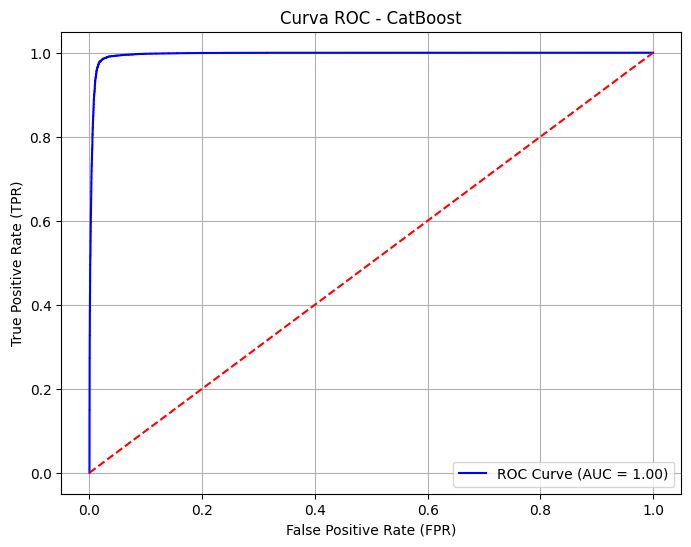

       Feature  Importancia
1   CODMUNNASC    13.664622
23    TPROBSON    11.372286
8     GESTACAO    11.260942
15      APGAR5     8.615954
4    ESTCIVMAE     8.493562
12      DTNASC     6.328812
17        PESO     4.004241
21  QTDPARTNOR     3.437307
24  KOTELCHUCK     2.953168
11   CONSULTAS     2.833628
3     IDADEMAE     2.578582
14      APGAR1     2.547383
18    IDANOMAL     2.262320
20  QTDGESTANT     2.262189
13        SEXO     2.113448
5       ESCMAE     1.897255
22  QTDPARTCES     1.492998
7   QTDFILMORT     1.422043
6   QTDFILVIVO     1.302423
10       PARTO     1.289246
9     GRAVIDEZ     0.762481
16     RACACOR     0.720838
19  RACACORMAE     0.435378
2      LOCNASC     0.383984


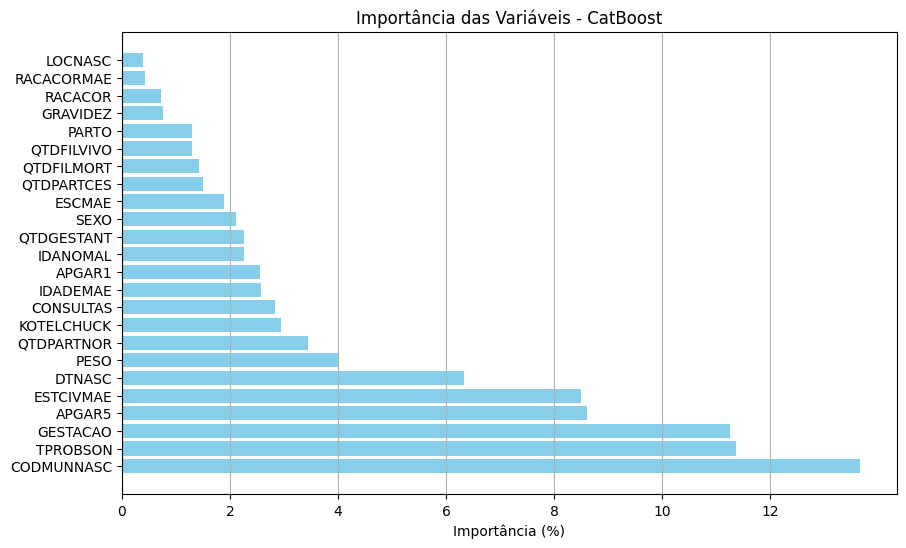

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14980
           1       0.98      0.98      0.98     15020

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



In [269]:
# Separando os dados (X são as variáveis independentes, y é a variável alvo)
X = df_s.drop('VIVO', axis=1)  # Substitua pela variável alvo correta
y = df_s['VIVO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo CatBoost
modelo = CatBoostClassifier(random_state=42, verbose=0)  # verbose=0 para evitar mensagens durante o treino
modelo.fit(X_train, y_train)

# Previsão das probabilidades para a classe positiva (morte neonatal)
y_probs = modelo.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando o valor da AUC
auc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_value}')

# Gerando o gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - CatBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Importância das variáveis
importancias = modelo.get_feature_importance()

# Criando um DataFrame para visualização
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': importancias
})

# Removendo a linha onde a coluna é "Unnamed: 0" (se existir)
importancia_df = importancia_df[importancia_df['Feature'] != 'Unnamed: 0']

# Ordenando o DataFrame pela importância
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Exibindo a importância das variáveis
print(importancia_df)

# Gerando gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'], color='skyblue')  # Multiplica por 100
plt.xlabel('Importância (%)')  # Atualiza o rótulo do eixo x
plt.title('Importância das Variáveis - CatBoost')
plt.grid(axis='x')

# Atualiza os ticks do eixo x para mostrar inteiros
plt.xticks(range(0, int(importancia_df['Importancia'].max()), 2))  # Ticks de 0 a 100 com passo de 5
plt.show()

# Previsão das classes
y_pred = modelo.predict(X_test)

# Avaliando o modelo com precisão, recall e F1-score
report = classification_report(y_test, y_pred)
print(report)

# Regressão Logística

AUC: 0.8424249176467848


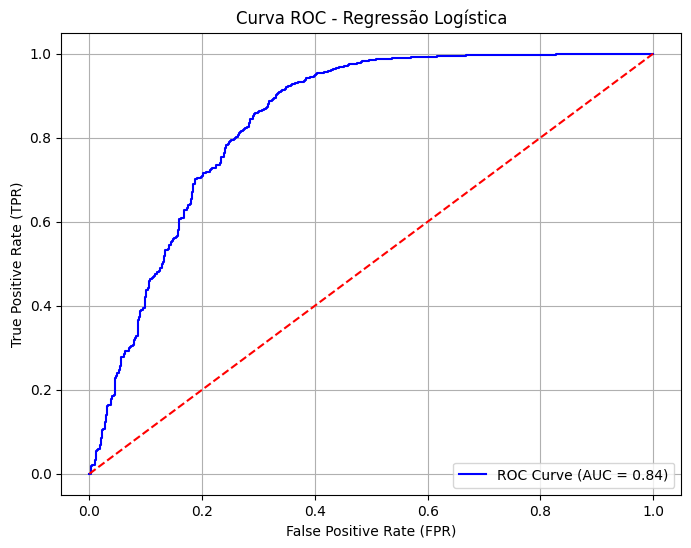

       Feature   Importancia
14      APGAR1  2.678011e-01
15      APGAR5  2.362622e-01
8     GESTACAO  4.481871e-02
11   CONSULTAS  1.721589e-02
4    ESTCIVMAE  1.460326e-02
18    IDANOMAL  1.340739e-02
13        SEXO  9.941893e-03
24  KOTELCHUCK  5.953547e-03
9     GRAVIDEZ  3.887799e-03
22  QTDPARTCES  3.568234e-03
2      LOCNASC  1.015624e-03
6   QTDFILVIVO  7.368497e-04
17        PESO  6.488741e-04
5       ESCMAE  2.875493e-04
1   CODMUNNASC  5.188491e-06
12      DTNASC -2.341067e-09
10       PARTO -3.815357e-04
20  QTDGESTANT -2.948308e-03
7   QTDFILMORT -4.277345e-03
21  QTDPARTNOR -5.693245e-03
16     RACACOR -2.036693e-02
19  RACACORMAE -2.036693e-02
3     IDADEMAE -2.315330e-02
23    TPROBSON -1.200367e-01


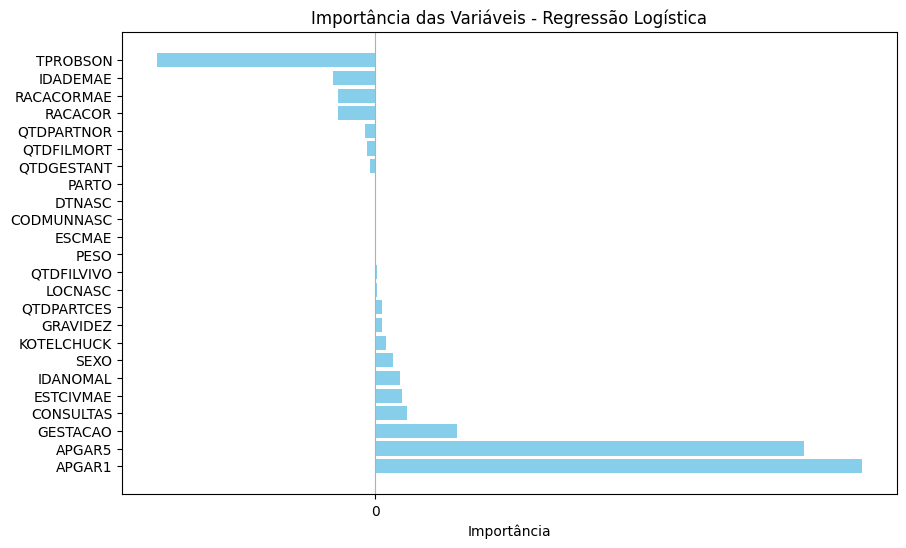

              precision    recall  f1-score   support

           0       0.24      0.03      0.05       445
           1       1.00      1.00      1.00    148654

    accuracy                           1.00    149099
   macro avg       0.62      0.51      0.52    149099
weighted avg       0.99      1.00      1.00    149099



In [271]:
# Separando os dados (X são as variáveis independentes, y é a variável alvo)
X = df.drop('VIVO', axis=1)  # Substitua pela variável alvo correta
y = df['VIVO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de Regressão Logística
modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(X_train, y_train)

# Previsão das probabilidades para a classe positiva (morte neonatal)
y_probs = modelo.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando o valor da AUC
auc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_value}')

# Gerando o gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Importância das variáveis (coeficientes)
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': modelo.coef_[0]
})

# Removendo a linha onde a coluna é "Unnamed: 0" (se existir)
importancia_df = importancia_df[importancia_df['Feature'] != 'Unnamed: 0']

# Ordenando o DataFrame pela importância
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Exibindo a importância das variáveis
print(importancia_df)

# Gerando gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'], color='skyblue')
plt.xlabel('Importância')  # Atualiza o rótulo do eixo x
plt.title('Importância das Variáveis - Regressão Logística')
plt.grid(axis='x')

# Atualiza os ticks do eixo x para mostrar inteiros
plt.xticks(range(int(importancia_df['Importancia'].min()), int(importancia_df['Importancia'].max()) + 1, 1))  # Ajuste conforme necessário
plt.show()

# Previsão das classes
y_pred = modelo.predict(X_test)

# Avaliando o modelo com precisão, recall e F1-score
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusão')
plt.ylabel('Valores Reais')
plt.xlabel('Valores Preditos')
plt.show()

# Calculando a curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Gerando o gráfico Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Random Forest')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# Calculando o Log-Loss
log_loss_value = log_loss(y_test, y_probs)
print(f'Log-Loss: {log_loss_value}')

AUC: 0.8618191990191585


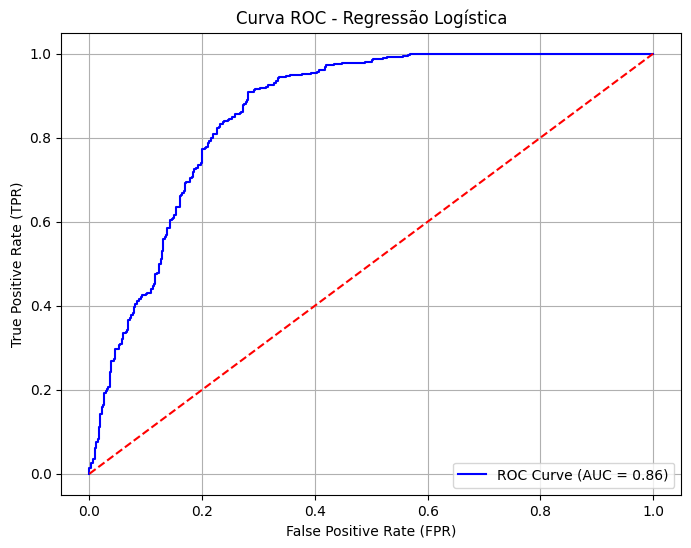

       Feature   Importancia
14      APGAR1  4.134979e-01
15      APGAR5  3.694407e-01
11   CONSULTAS  3.443391e-02
24  KOTELCHUCK  3.284525e-02
8     GESTACAO  3.214141e-02
13        SEXO  2.515920e-02
5       ESCMAE  1.214803e-02
4    ESTCIVMAE  6.076509e-03
22  QTDPARTCES  4.388038e-03
18    IDANOMAL  3.833619e-03
2      LOCNASC  2.875975e-03
9     GRAVIDEZ  2.635693e-03
6   QTDFILVIVO  1.680751e-03
3     IDADEMAE  8.566624e-04
17        PESO  7.718392e-04
12      DTNASC  9.579776e-10
1   CODMUNNASC -3.785467e-05
10       PARTO -3.715551e-03
20  QTDGESTANT -3.950100e-03
21  QTDPARTNOR -4.705833e-03
7   QTDFILMORT -6.835188e-03
19  RACACORMAE -3.948150e-02
16     RACACOR -3.948150e-02
23    TPROBSON -1.425269e-01


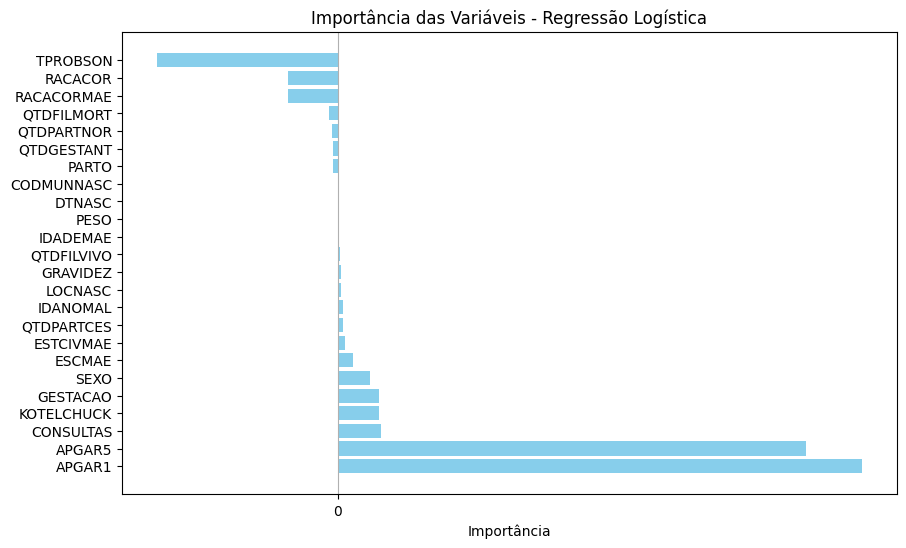

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       419
           1       0.75      0.86      0.80       401

    accuracy                           0.79       820
   macro avg       0.80      0.80      0.79       820
weighted avg       0.80      0.79      0.79       820



In [284]:
# Separando os dados (X são as variáveis independentes, y é a variável alvo)
X = df_ns.drop('VIVO', axis=1)  # Substitua pela variável alvo correta
y = df_ns['VIVO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de Regressão Logística
modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(X_train, y_train)

# Previsão das probabilidades para a classe positiva (morte neonatal)
y_probs = modelo.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando o valor da AUC
auc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_value}')

# Gerando o gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Importância das variáveis (coeficientes)
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': modelo.coef_[0]
})

# Removendo a linha onde a coluna é "Unnamed: 0" (se existir)
importancia_df = importancia_df[importancia_df['Feature'] != 'Unnamed: 0']

# Ordenando o DataFrame pela importância
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Exibindo a importância das variáveis
print(importancia_df)

# Gerando gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'], color='skyblue')
plt.xlabel('Importância')  # Atualiza o rótulo do eixo x
plt.title('Importância das Variáveis - Regressão Logística')
plt.grid(axis='x')

# Atualiza os ticks do eixo x para mostrar inteiros
plt.xticks(range(int(importancia_df['Importancia'].min()), int(importancia_df['Importancia'].max()) + 1, 1))  # Ajuste conforme necessário
plt.show()

# Previsão das classes
y_pred = modelo.predict(X_test)

# Avaliando o modelo com precisão, recall e F1-score
report = classification_report(y_test, y_pred)
print(report)

AUC: 0.9557402324270798


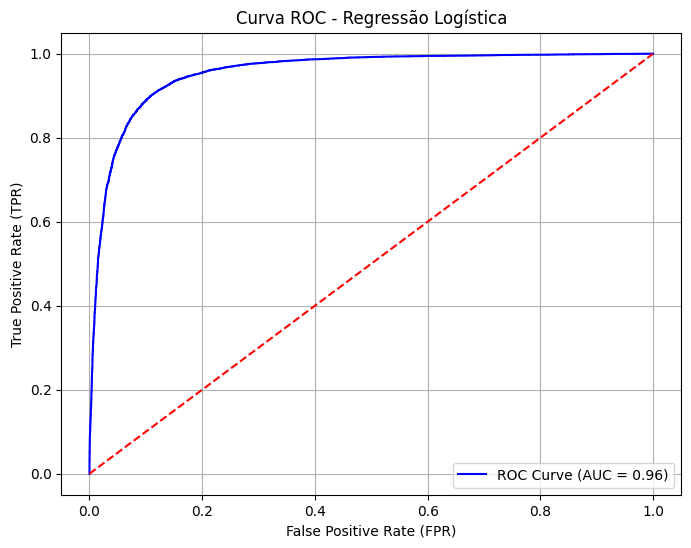

       Feature   Importancia
15      APGAR5  7.083121e-01
14      APGAR1  5.750840e-01
8     GESTACAO  3.495213e-01
11   CONSULTAS  3.186150e-01
13        SEXO  2.754432e-01
24  KOTELCHUCK  2.159503e-01
5       ESCMAE  2.139828e-01
4    ESTCIVMAE  1.855284e-01
10       PARTO  1.849290e-01
22  QTDPARTCES  1.650978e-01
6   QTDFILVIVO  1.468179e-01
20  QTDGESTANT  1.365041e-01
23    TPROBSON  1.345265e-01
7   QTDFILMORT  1.188672e-01
21  QTDPARTNOR  1.048632e-01
18    IDANOMAL  9.353508e-02
9     GRAVIDEZ  2.609529e-02
2      LOCNASC  2.298408e-02
17        PESO  1.034674e-03
12      DTNASC  5.081788e-09
1   CODMUNNASC -8.294905e-05
3     IDADEMAE -5.741436e-02
19  RACACORMAE -6.918233e-02
16     RACACOR -6.918233e-02


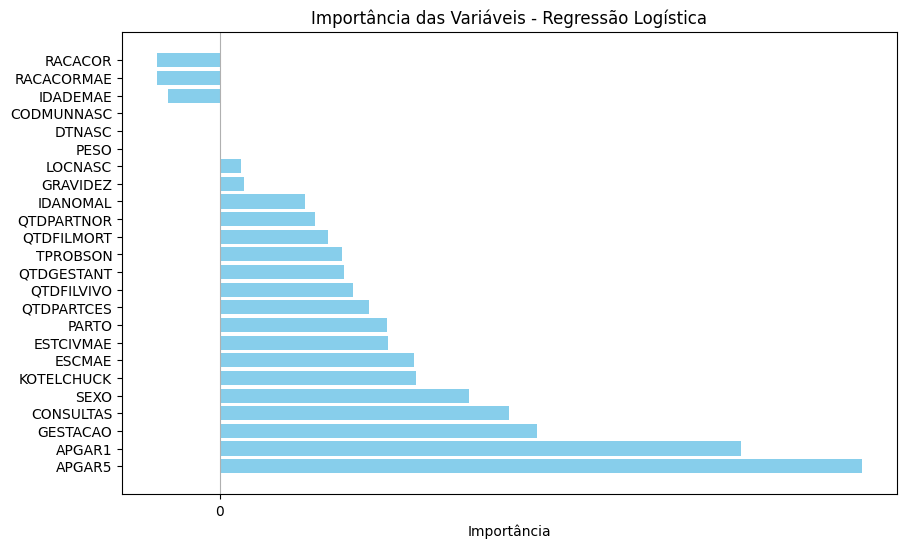

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     14980
           1       0.87      0.93      0.90     15020

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



In [233]:
# Separando os dados (X são as variáveis independentes, y é a variável alvo)
X = df_s.drop('VIVO', axis=1)  # Substitua pela variável alvo correta
y = df_s['VIVO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de Regressão Logística
modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(X_train, y_train)

# Previsão das probabilidades para a classe positiva (morte neonatal)
y_probs = modelo.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando o valor da AUC
auc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc_value}')

# Gerando o gráfico da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Importância das variáveis (coeficientes)
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': modelo.coef_[0]
})

# Removendo a linha onde a coluna é "Unnamed: 0" (se existir)
importancia_df = importancia_df[importancia_df['Feature'] != 'Unnamed: 0']

# Ordenando o DataFrame pela importância
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Exibindo a importância das variáveis
print(importancia_df)

# Gerando gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'], color='skyblue')
plt.xlabel('Importância')  # Atualiza o rótulo do eixo x
plt.title('Importância das Variáveis - Regressão Logística')
plt.grid(axis='x')

# Atualiza os ticks do eixo x para mostrar inteiros
plt.xticks(range(int(importancia_df['Importancia'].min()), int(importancia_df['Importancia'].max()) + 1, 1))  # Ajuste conforme necessário
plt.show()

# Previsão das classes
y_pred = modelo.predict(X_test)

# Avaliando o modelo com precisão, recall e F1-score
report = classification_report(y_test, y_pred)
print(report)